In [5]:
import tensorflow as tf
import os
from pathlib import Path
import numpy as np
from tqdm import tqdm
from skimage.io import imread,imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
import random
np.random.seed=42
img_hw = 128
img_c = 3


In [6]:
inputs = tf.keras.layers.Input((img_hw,img_hw,img_c))
norm = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(norm)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1,(1,1), activation='sigmoid')(c9)
model = tf.keras.Model(inputs=[inputs],outputs=[outputs])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()


I0000 00:00:1741364561.222662     570 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4080 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 128, 128,  │          0 │ input_layer[0][0] │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │        448 │ lambda[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128, 128,  │          0 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │      2,320 │ dropout[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │      9,248 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 16, 16,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 16, 16,    │          0 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 16, 16,    │    147,584 │ dropout_3[0][0] 

 Total params: 1,941,105 (7.40 MB)

 Trainable params: 1,941,105 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
TRAIN_PATH = 'data/train/'
TEST_PATH = 'data/test/'
IMG_HEIGHT = 128
IMG_WIDTH = 128
IMG_CHANNELS=3
train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):   
    path = TRAIN_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]  
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img  #Fill empty X_train with values from img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
                                      preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)  
            
    Y_train[n] = mask   

# test images
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Resizing test images') 
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img
print('done')

Resizing training images and masks


100%|██████████| 670/670 [08:39<00:00,  1.29it/s]


Resizing test images


100%|██████████| 65/65 [00:01<00:00, 34.08it/s]

done


In [8]:

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("checkpoints/u-net.h5",monitor='val_loss'),
    tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=3),
    tf.keras.callbacks.TensorBoard(log_dir='logs')]

model.fit(x=X_train,y=Y_train,batch_size=16,epochs=25,verbose=1,callbacks=callbacks)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)
I0000 00:00:1741365088.913846   13373 service.cc:148] XLA service 0x7f2174007970 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741365088.914429   13373 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2025-03-07 20:01:29.072627: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741365089.860281   13373 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-07 20:01:31.352970: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[16,16,128

41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7185 - loss: 0.6619

2025-03-07 20:01:46.911720: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[14,16,128,128]{3,2,1,0}, u8[0]{0}) custom-call(f32[14,3,128,128]{3,2,1,0}, f32[16,3,3,3]{3,2,1,0}, f32[16]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-03-07 20:01:47.008668: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[14,16,128,128]{3,2,1,0}, u8[0]{0}) custom-call(f32[14,16,128,128]{3,2,1,0}, f32[16,16,3,3]{3,2,1,0}, f32[16]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasAct

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.7192 - loss: 0.6602

42/42 ━━━━━━━━━━━━━━━━━━━━ 34s 361ms/step - accuracy: 0.7198 - loss: 0.6585
Epoch 2/25
 3/42 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7754 - loss: 0.3923

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8199 - loss: 0.3424

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8216 - loss: 0.3402
Epoch 3/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9249 - loss: 0.2018

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9252 - loss: 0.2008
Epoch 4/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9395 - loss: 0.1594

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9396 - loss: 0.1590
Epoch 5/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9488 - loss: 0.1344

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9487 - loss: 0.1345
Epoch 6/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9476 - loss: 0.1423

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9478 - loss: 0.1418
Epoch 7/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9538 - loss: 0.1217

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9538 - loss: 0.1218
Epoch 8/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9549 - loss: 0.1188

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9548 - loss: 0.1191
Epoch 9/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9575 - loss: 0.1154

42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9575 - loss: 0.1153
Epoch 10/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9586 - loss: 0.1086

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9586 - loss: 0.1086
Epoch 11/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9594 - loss: 0.1083

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9594 - loss: 0.1083
Epoch 12/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9619 - loss: 0.1013

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9619 - loss: 0.1014
Epoch 13/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9581 - loss: 0.1090

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9583 - loss: 0.1087
Epoch 14/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9610 - loss: 0.1044

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9611 - loss: 0.1041
Epoch 15/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9612 - loss: 0.1002

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9612 - loss: 0.1001
Epoch 16/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9625 - loss: 0.0960

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9625 - loss: 0.0961
Epoch 17/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9619 - loss: 0.0998

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9620 - loss: 0.0997
Epoch 18/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9618 - loss: 0.0962

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9619 - loss: 0.0960
Epoch 19/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9659 - loss: 0.0887

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9658 - loss: 0.0888
Epoch 20/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9649 - loss: 0.0931

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9649 - loss: 0.0931
Epoch 21/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9633 - loss: 0.0971

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9633 - loss: 0.0968
Epoch 22/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9678 - loss: 0.0830

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9677 - loss: 0.0832
Epoch 23/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9665 - loss: 0.0854

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9665 - loss: 0.0855
Epoch 24/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9687 - loss: 0.0800

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9686 - loss: 0.0803
Epoch 25/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9653 - loss: 0.0884

42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9653 - loss: 0.0883


In [9]:
idx = random.randint(0, len(X_train))


preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

 
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)



 

/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 128, 128, 3))
  warnings.warn(msg)
2025-03-07 20:02:50.583061: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,16,128,128]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,128,128]{3,2,1,0}, f32[16,3,3,3]{3,2,1,0}, f32[16]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-03-07 20:02:50.737281: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy

16/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

2025-03-07 20:02:53.596999: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[27,16,128,128]{3,2,1,0}, u8[0]{0}) custom-call(f32[27,3,128,128]{3,2,1,0}, f32[16,3,3,3]{3,2,1,0}, f32[16]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-03-07 20:02:53.730180: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[27,16,128,128]{3,2,1,0}, u8[0]{0}) custom-call(f32[27,16,128,128]{3,2,1,0}, f32[16,16,3,3]{3,2,1,0}, f32[16]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasAct

19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

2025-03-07 20:02:56.433941: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[3,64,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[3,32,32,32]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-03-07 20:02:56.479097: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[3,64,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[3,64,32,32]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationFor

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 836ms/step
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

2025-03-07 20:02:58.195044: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[1,64,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,64,32,32]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-03-07 20:02:58.256625: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[1,128,16,16]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,64,16,16]{3,2,1,0}, f32[128,64,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivation

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 776ms/step


/tmp/ipykernel_570/3140934473.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(np.squeeze(Y_train[ix]))


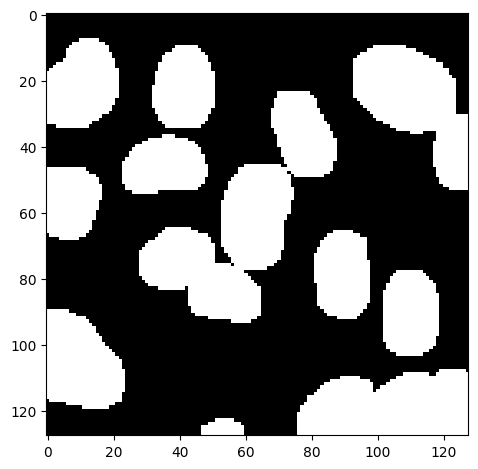

/tmp/ipykernel_570/3140934473.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(np.squeeze(preds_train_t[ix]))
/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


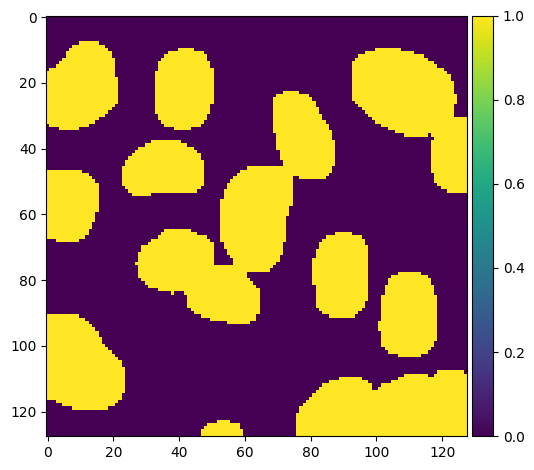

/tmp/ipykernel_570/3140934473.py:9: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(X_train[int(X_train.shape[0]*0.9):][ix])


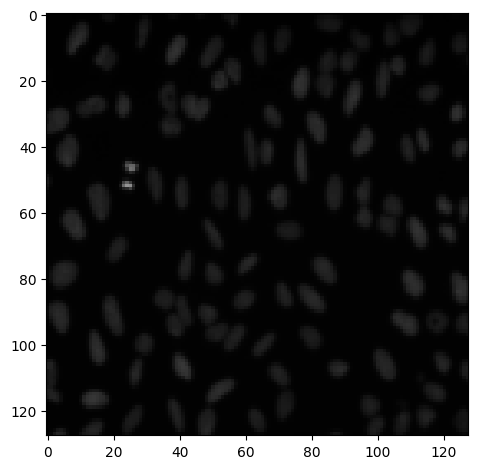

/tmp/ipykernel_570/3140934473.py:11: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))


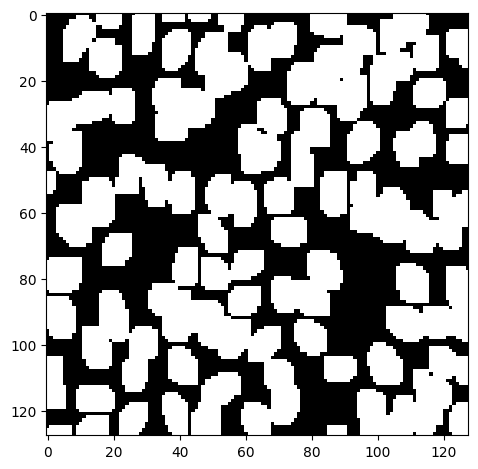

/tmp/ipykernel_570/3140934473.py:13: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(np.squeeze(preds_val_t[ix]))
/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


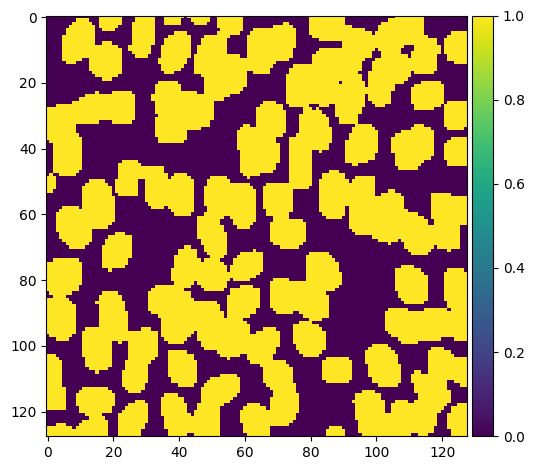

/tmp/ipykernel_570/3140934473.py:19: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(X_test[:int(X_test.shape[0]*0.9)][ix])


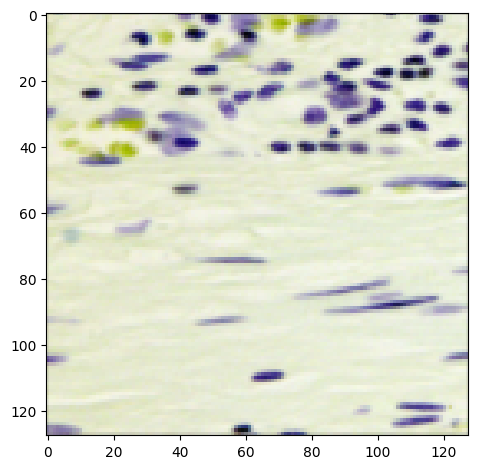

/tmp/ipykernel_570/3140934473.py:21: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(np.squeeze(preds_test_t[ix]))
/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


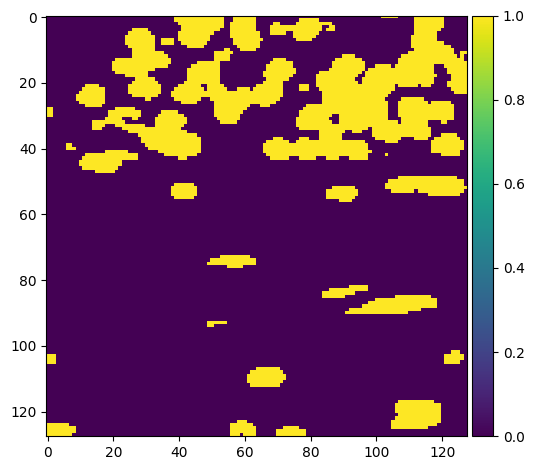

In [11]:
ix = random.randint(0, len(preds_train_t))
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()


# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_test_t))
imshow(X_test[:int(X_test.shape[0]*0.9)][ix])
plt.show()
imshow(np.squeeze(preds_test_t[ix]))
plt.show()